In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [13]:
path = '/kaggle/input/dogs-vs-cats/train.zip'
extract_to = './train'
import zipfile
with zipfile.ZipFile(path,'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [14]:
path = '/kaggle/input/dogs-vs-cats/test1.zip'
extract_to = './test'
import zipfile
with zipfile.ZipFile(path,'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [25]:
import torch
from torch import nn
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [16]:
train_transform = transforms.Compose([transforms.Resize(30),
                              transforms.RandomHorizontalFlip(),
                              transforms.RandomRotation(30),
                              transforms.RandomResizedCrop(28),
                              transforms.ToTensor(),
                             transforms.Normalize([0.5,0.5,0.5],
                                                 [0.5,0.5,0.5])])

test_transform = transforms.Compose([transforms.Resize(28),
                              transforms.ToTensor(),
                             transforms.Normalize([0.5,0.5,0.5],
                                                 [0.5,0.5,0.5])])

train = datasets.ImageFolder('train',transform = train_transform)
test = datasets.ImageFolder('test',transform = test_transform)

In [20]:
trainloader = torch.utils.data.DataLoader(train,batch_size = 32, shuffle = True)
testloader = torch.utils.data.DataLoader(test,batch_size = 32, shuffle = False)

In [38]:
##model
class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        self.conv1 = nn.Conv2d(3,64,3)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(64,32,3)
        self.lilay1 = nn.Linear(32*5*5,128)
        self.lilay2 = nn.Linear(128,84)
        self.lilay3 = nn.Linear(84,2)
        self.softmax = nn.LogSoftmax(dim = 1)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,32*5*5)
        x = F.relu(self.lilay1(x))
        x = F.relu(self.lilay2(x))
        x = self.lilay3(x)
        x = self.softmax(x)
        return x
model = NN()
        
        
        

In [39]:
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [40]:
epochs = 3
print_every = 100
for e in range(epochs):
    running_loss= 0
    correct = 0
    total = 0
    print('Epochs:',e+1)
    
    model.train()
    for i, (images,labels) in enumerate(iter(trainloader)):
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i%print_every == 0:
            print(f'iteration:{i}\t Loss:{running_loss/print_every:.4f}')
            running_loss = 0
            
    model.eval()       
    with torch.no_grad():
        outputs = model(images)
        _,predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100*correct/total}')

Epochs: 1
iteration:0	 Loss:0.0070
iteration:100	 Loss:0.0218
iteration:200	 Loss:0.0000
iteration:300	 Loss:0.0000
iteration:400	 Loss:0.0000
iteration:500	 Loss:0.0000
iteration:600	 Loss:0.0000
iteration:700	 Loss:0.0000
Accuracy: 100.0
Epochs: 2
iteration:0	 Loss:0.0000
iteration:100	 Loss:0.0000
iteration:200	 Loss:0.0000
iteration:300	 Loss:0.0000
iteration:400	 Loss:0.0000
iteration:500	 Loss:0.0000
iteration:600	 Loss:0.0000
iteration:700	 Loss:0.0000
Accuracy: 100.0
Epochs: 3
iteration:0	 Loss:0.0000
iteration:100	 Loss:0.0000
iteration:200	 Loss:0.0000
iteration:300	 Loss:0.0000
iteration:400	 Loss:0.0000
iteration:500	 Loss:0.0000
iteration:600	 Loss:0.0000
iteration:700	 Loss:0.0000
Accuracy: 100.0


In [43]:
import matplotlib.pyplot as plt

<AxesSubplot:>

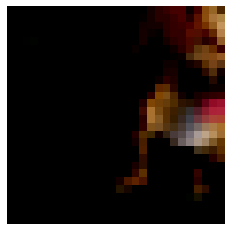

In [44]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


# Run this to test your data loaders
images, labels = next(iter(trainloader))
imshow(images[19], normalize=False)



In [ ]:
train.classes

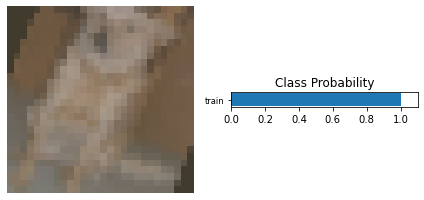

In [47]:


import numpy as np
class_list = train.classes

def view_classify_general(img, ps, class_list):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    imshow(img, ax=ax1, normalize=True)
    ax1.axis('off')
    ax2.barh(np.arange(len(class_list)), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(len(class_list)))
    ax2.set_yticklabels([x for x in class_list], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

images, labels = next(iter(trainloader))
img, label = images[0], labels[0]
# Flatten images
# Forward pass, get our logits
logits = model(img.view(1, *images[0].shape))
# Calculate the loss with the logits and the labels
ps = torch.exp(logits)
    
view_classify_general(img, ps, class_list)